In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

In [2]:
import rompy as rp 

In [3]:
from scrinet import fits

# gen data

In [4]:
def gen_data(x):
    x0, x1, x2 = np.meshgrid(x, x, x)
    x0 = x0.ravel()
    x1 = x1.ravel()
    x2 = x2.ravel()
    z = np.sin(5 * x0) + .4 * np.sin(x1) + .2 * np.sin(x2)
    return x0, x1, x2, z

In [6]:
x = np.linspace(0, 1, 10)
x0, x1, x2, z = gen_data(x)

In [7]:
# validation set
x_val = np.linspace(0, 1, 20)
x0_val, x1_val, x2_val, z_val = gen_data(x_val)

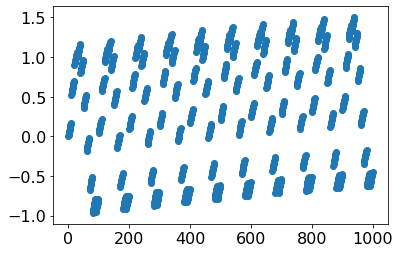

In [8]:
plt.figure()
plt.scatter(range(len(z)), z)

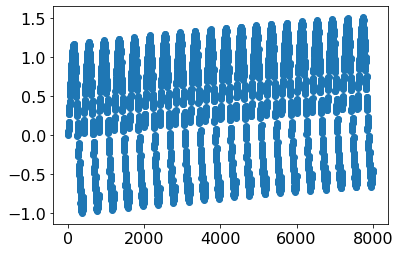

In [9]:
plt.figure()
plt.scatter(range(len(z_val)), z_val)

# fit with rompy

In [10]:
def polyfit3d_interpolant(x0,x1,x2,z1,deg):
    interpolant = rp.MultivariateFits([x0,x1,x2], z1, fit='polyfit3d', deg=deg)
    return interpolant

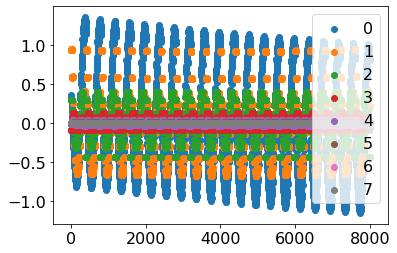

In [11]:
plt.figure()
degs = range(8)
for deg in degs:
    rp_int = polyfit3d_interpolant(x0, x1, x2, z, deg=deg)
    prediction = rp_int([x0_val, x1_val, x2_val])
    
    plt.scatter(range(len(z_val)), prediction - z_val, label=deg)
plt.legend()
plt.show()
plt.close()

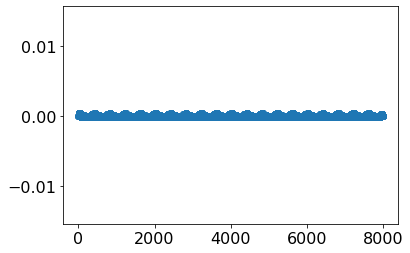

In [43]:

rp_int = polyfit3d_interpolant(x0, x1, x2, z, deg=7)
rp_prediction = rp_int([x0_val, x1_val, x2_val])
plt.figure()
plt.scatter(range(len(z_val)), rp_prediction - z_val, label=deg)

# fit with scrinet

In [18]:
X = np.array(list(zip(x0, x1, x2)))

In [23]:
Xval = np.array(list(zip(x0_val, x1_val, x2_val)))

In [19]:
X.shape

(1000, 3)

In [88]:
lr = fits.poly.LinearPolynomialBasisRegression()
lr.fit(X, z, maxdegs=[7,7,7])

In [89]:
lr.loss(X, z)

1.5651495887449193e-06

In [90]:
lr.loss(Xval, z_val)

6.684377258316735e-05

In [91]:
lr.degrees

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [0, 0, 3],
 [0, 0, 4],
 [0, 0, 5],
 [0, 0, 6],
 [0, 0, 7],
 [1, 0, 0],
 [1, 0, 1],
 [1, 0, 2],
 [1, 0, 3],
 [1, 0, 4],
 [1, 0, 5],
 [1, 0, 6],
 [2, 0, 0],
 [2, 0, 1],
 [2, 0, 2],
 [2, 0, 3],
 [2, 0, 4],
 [2, 0, 5],
 [3, 0, 0],
 [3, 0, 1],
 [3, 0, 2],
 [3, 0, 3],
 [3, 0, 4],
 [4, 0, 0],
 [4, 0, 1],
 [4, 0, 2],
 [4, 0, 3],
 [5, 0, 0],
 [5, 0, 1],
 [5, 0, 2],
 [6, 0, 0],
 [6, 0, 1],
 [7, 0, 0],
 [0, 1, 0],
 [0, 1, 1],
 [0, 1, 2],
 [0, 1, 3],
 [0, 1, 4],
 [0, 1, 5],
 [0, 1, 6],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 2],
 [1, 1, 3],
 [1, 1, 4],
 [1, 1, 5],
 [2, 1, 0],
 [2, 1, 1],
 [2, 1, 2],
 [2, 1, 3],
 [2, 1, 4],
 [3, 1, 0],
 [3, 1, 1],
 [3, 1, 2],
 [3, 1, 3],
 [4, 1, 0],
 [4, 1, 1],
 [4, 1, 2],
 [5, 1, 0],
 [5, 1, 1],
 [6, 1, 0],
 [0, 2, 0],
 [0, 2, 1],
 [0, 2, 2],
 [0, 2, 3],
 [0, 2, 4],
 [0, 2, 5],
 [1, 2, 0],
 [1, 2, 1],
 [1, 2, 2],
 [1, 2, 3],
 [1, 2, 4],
 [2, 2, 0],
 [2, 2, 1],
 [2, 2, 2],
 [2, 2, 3],
 [3, 2, 0],
 [3, 2, 1],
 [3, 2, 2],
 [4, 2, 0],
 [4,

In [44]:
scri_prediction = lr.predict(Xval)

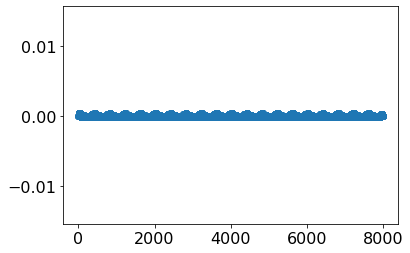

In [45]:
plt.figure()
plt.scatter(range(len(z_val)), scri_prediction - z_val)


In [ ]:
# search for the best set of degrees

In [107]:
max_degs = fits.poly.generate_degrees([10,10,10], max_deg_total=30)

In [109]:
best_lr, best_deg_idx = \
    fits.poly.findpolyfit(X, z, max_degs=max_degs, output_best=True)

lowest_deg for training set = 1196
lowest loss for training set = 4.500660905048953e-19


In [110]:
max_degs[best_deg_idx]

array([9, 9, 8])

In [111]:
scri_prediction_best = best_lr.predict(Xval)

(-0.001, 0.001)

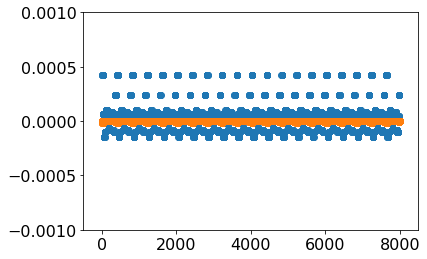

In [117]:
plt.figure()
plt.scatter(range(len(z_val)), scri_prediction - z_val)
plt.scatter(range(len(z_val)), scri_prediction_best - z_val)
plt.ylim(-1e-3,1e-3)

# compare

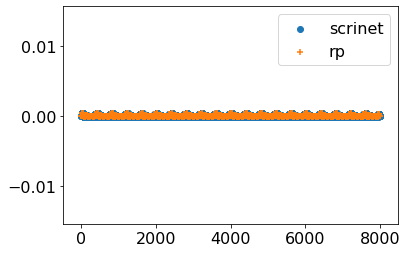

In [113]:
plt.figure()
plt.scatter(range(len(z_val)), scri_prediction - z_val, label='scrinet')
plt.scatter(range(len(z_val)), rp_prediction - z_val, label='rp', marker='+')
plt.legend()
# plt.xlim(0,10)

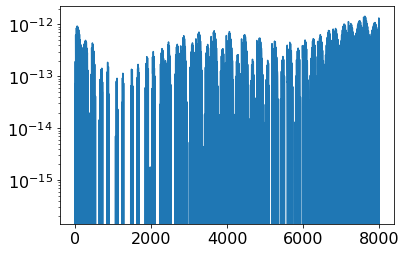

In [116]:
plt.figure()
plt.plot(range(len(z_val)), rp_prediction - scri_prediction)
plt.yscale('log')